In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [27]:
movies = pd.read_csv('tmdb_5000_movies.csv')
movies2 = pd.read_csv('movies.csv')
ratings2 = pd.read_csv('ratings.csv')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
total_ingles = movies.query("original_language=='en'").original_language.value_counts().sum()
total_resto = movies.query("original_language!='en'").original_language.value_counts().sum()

data_frame_dic = {
    'linguas': ['ingles', 'outras'],
    'total': [total_ingles, total_resto]
}

data_frame = pd.DataFrame(data_frame_dic)
data_frame


,linguas,total
0,ingles,4505
1,outras,298


<AxesSubplot:xlabel='linguas', ylabel='total'>

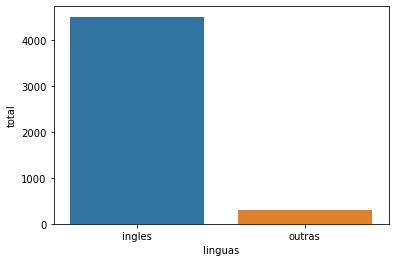

In [6]:
sns.barplot(x='linguas', y='total', data=data_frame)

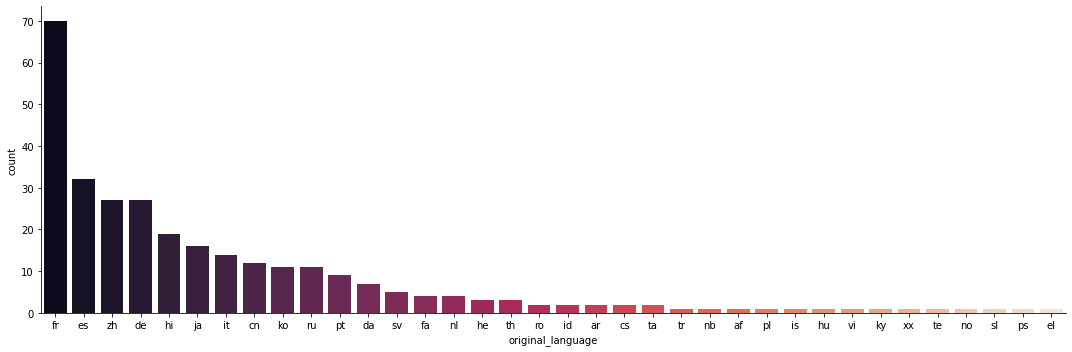

In [23]:
sns.catplot(x='original_language', kind='count', data=movies.query("original_language != 'en'"), 
            aspect=3, 
            order=movies.query("original_language != 'en'").original_language.value_counts().index,
            palette = 'rocket'
           )



In [26]:
movies2.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [30]:
toy_media = ratings2.query("movieId==1").rating.mean()

jumanji_media = ratings2.query("movieId==2").rating.mean()

MÉDIA NÃO SIGNIFICA MUITA COISA!

(array([ 1.,  1.,  2.,  5., 12., 28., 11., 36.,  7.,  7.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

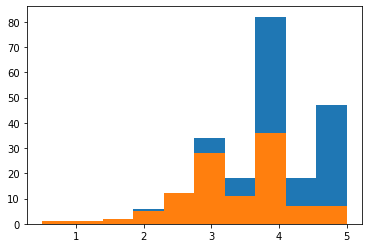

In [38]:
toy = ratings2.query("movieId==1").rating
jumanji = ratings2.query("movieId==2").rating

plt.hist(toy)
plt.hist(jumanji)

{'whiskers': [<matplotlib.lines.Line2D at 0x2018a6ec370>,
 'caps': [<matplotlib.lines.Line2D at 0x2018a6d0f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2018a6ec850>,
 'medians': [<matplotlib.lines.Line2D at 0x2018a6cc6a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2018a6cc340>,
 'means': []}

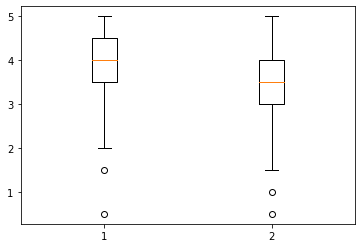

In [39]:
plt.boxplot([toy, jumanji])

<AxesSubplot:xlabel='movieId', ylabel='rating'>

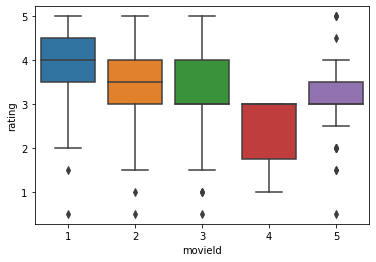

In [43]:
sns.boxplot(x='movieId', y='rating', data = ratings2.query('movieId in [1, 2, 3, 4, 5]'))

In [44]:
jumanji.std()

0.8817134921476455

In [45]:
toy.std()

0.8348591407114045